# Day 4: Exercise 

## 1. Image plotting and manipulation

In [2]:
"""
SciPy Package is a library used for scientific computing

clustering
fourier transforms
linear algebra
optimization alforithm
statistics
"""

from scipy import misc
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

numpy.ndarray

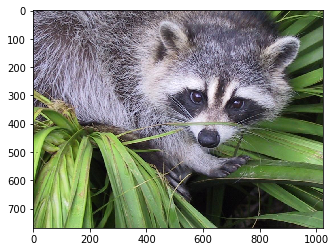

In [3]:
# get a random picture 
face = misc.face()
plt.imshow(face)
type(face)

# optional: use your own picture


### 1.1 Rotate a picture

Write a function which rotates a picture by a number of 90 degree angles. The function should check of the input angle is a multiple of 90. If not, print out a message!

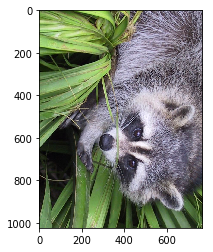

In [4]:
def rotate_pic_1(pic, angle):
    # YOUR CODE starts here!
    k = angle//90
    plt.imshow(np.rot90(face, k))
    #plt.imshow(np.transpose(face, [1,0,2]))
    # YOUR CODE ENDS here!
rotate_pic_1(face, 270)

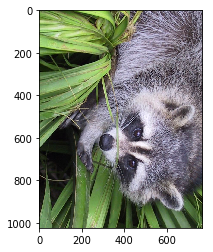

In [5]:
def rotate_pic_2(pic, angle):
    # YOUR CODE starts here!
    k = angle//90
    k = k%4 
    if k==0:
        plt.imshow(pic)
    elif k==1:
        pic = np.flip(np.transpose(pic,[1,0,2]),axis=0)
        plt.imshow(pic)
    elif k == 2:
        plt.imshow(np.flip(pic ,axis=(0,1)))
    else:
        plt.imshow(np.flip(np.transpose(pic, [1,0,2]),axis=1))
    # YOUR CODE ENDS here!
rotate_pic_2(face, 270)
#plt.imshow(face.transpose((1,0,2)))

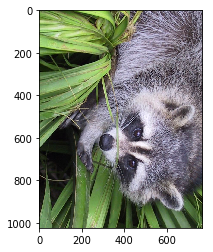

In [6]:
def rotate_pic_3(pic, angle):
    # YOUR CODE starts here!
    k = angle//90
    k = k%4 
    if k==0:
        plt.imshow(pic)
    elif k==1:
        pic = np.transpose(pic[:,::-1,:],[1,0,2])
    elif k ==2:
        pic = pic[::-1,::-1,:]
    else:
        pic = np.transpose(pic[::-1,:,:],[1,0,2])
    plt.imshow(pic)
    # YOUR CODE ENDS here!
rotate_pic_3(face, 270)

### 1.2 Mirror a picture

Write a function which mirrors a picture by the vertical or horizontal axis. Since there are only two possible axis, you can use a boolean to specify the angle.

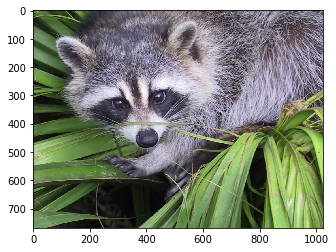

In [7]:
def mirror_pic(pic, vertical):
    # YOUR CODE starts here!
    if vertical:
        plt.imshow(face[:,::-1,:])
    else:
        plt.imshow(face[::-1,:,:])
    # YOUR CODE ENDS here!
mirror_pic(face, True)

### 1.3 Make a picture black and white

Write a function which makes the image black and white. You can change a pixel to gray by assigning the mean to all three color channels. Example: (0,50,100) becomes (50,50,50)

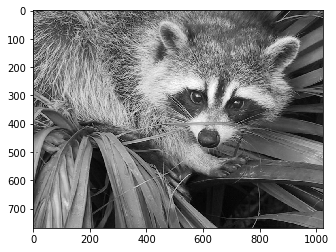

In [8]:
def black_n_white_1(pic):
    # YOUR CODE starts here!
    pic2 = pic.copy()
    for i in range(pic.shape[0]):
        for j in range(pic.shape[1]):
            pic2[i,j,:] = np.mean(pic[i,j,:])
    plt.imshow(pic2)
    # YOUR CODE ENDS here!
black_n_white_1(face)

[[[121 121 121]
  [138 138 138]
  [154 154 154]
  ...
  [106 106 106]
  [116 116 116]
  [124 124 124]]

 [[ 90  90  90]
  [111 111 111]
  [131 131 131]
  ...
  [104 104 104]
  [120 120 120]
  [132 132 132]]

 [[ 74  74  74]
  [ 95  95  95]
  [116 116 116]
  ...
  [104 104 104]
  [120 120 120]
  [131 131 131]]

 ...

 [[ 89  89  89]
  [ 95  95  95]
  [107 107 107]
  ...
  [125 125 125]
  [124 124 124]
  [124 124 124]]

 [[ 86  86  86]
  [ 96  96  96]
  [111 111 111]
  ...
  [124 124 124]
  [123 123 123]
  [123 123 123]]

 [[ 86  86  86]
  [ 98  98  98]
  [111 111 111]
  ...
  [123 123 123]
  [122 122 122]
  [121 121 121]]]


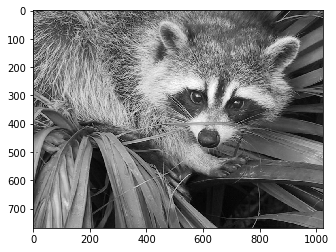

In [9]:
def black_n_white_2(pic):
    pic2 = pic.copy()
    means = np.mean(pic, axis=2)
    for i in range(pic.shape[0]):
        for j in range(pic.shape[1]):
            pic2[i,j,:] = means[i,j]
    print(pic2)
    plt.imshow(pic2)
black_n_white_2(face)

(768, 1024, 3)


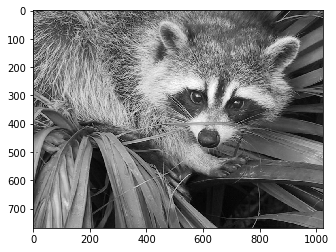

In [10]:
def black_n_white_3(pic):
    plt.imshow(np.stack([np.mean(pic, axis=2)]*3,axis=2)/255)
black_n_white_3(face)
print(face.shape)

### 1.4 Zoom into a picture

Write a function, which zooms into a given position (`x` and `y`), and cuts out a window of size `n` around that position. You should check that the x and y are withing the image, and also the window is within the image's borders. If not, print out a message.

Plot the picture.

Bonus: Draw a red square around the the zoomed part in the original picture, and plot both pics together. 



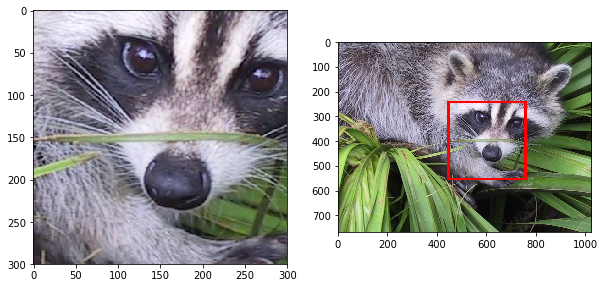

In [11]:
def zoom_pic(pic, x, y, n, d=10):
    # YOUR CODE starts here!
    
    #check borders:
    if x-((n//2)+d) > 0 and x+((n//2)+d) < pic.shape[1] and\
        y-((n//2)+d) > 0 and y+((n//2)+d) < pic.shape[0]: # # left and right and up and down borders
        
        pic_red = pic.copy() # create copy, since we will need the original
        pic_red[x-n-d:x+n+d, y-n-d:y+n+d,:] = [255,0,0] 
        
        # cut out part we wnt to zoom in
        subarray = pic[x-n:x+n, y-n:y+n]
        pic_red[x-n:x+n, y-n:y+n] = subarray
        
        #plot the stuff
        fig, axes = plt.subplots(1,2, figsize=(10,5))
        axes[0].imshow(subarray)
        axes[1].imshow(pic_red)
    else:
        print("Can't zoom outside borders!")
   
    # YOUR CODE ENDS here!
zoom_pic(face, 400, 600, 150)

### 1.4 Make Checkerboard Filter

Write a function, which cuts the image into `n`x `m`  little pieces, and then arranges the pieces random into a new picture. The new picture should have the same size as the original pic.

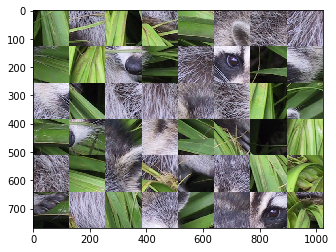

In [12]:
import random

def checker_filter_py(pic, n, m):
    # YOUR CODE starts here!
    
    h = pic.shape[0] // n
    w = pic.shape[1] // m
    
    pieces = np.split(pic,n, axis=0)
    
    pieces = [pic[i*h:(i+1)*h,:,:] for i in range(n)] # split in rows in n pieces
    
    pieces = [x[:,j*w:(j+1)*w,:] for j in range(m) for x in pieces] # split cols in m pieces
    
    # create empty array we will fill
    checker = np.zeros_like(pic)
    
    # mix our pieces
    random.shuffle(pieces)
    
    # fill tile wise our empty array with pieces
    for i in range(n):
        for j in range(m):
            checker[i*h:(i+1)*h,j*w:(j+1)*w,:] = pieces.pop(0)
            
                
    plt.imshow(checker)
    
    # YOUR CODE ENDS here!
checker_filter_py(face, 6, 8) #equals 12 pieces

(768, 1024, 3)
(3, 256, 256, 3)
(3072, 256, 3)
(768, 256, 3)


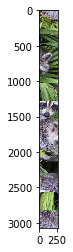

In [13]:
def checker_filter_np(pic, n, m):
    
    print(pic.shape)
    pieces = np.split(pic,n,axis=0) #split horizontally
    pieces = [np.split(x,m,axis=1) for x in pieces] # split all elements vertically
    # flatten a list of lists
    # https://stackoverflow.com/questions/952914/how-to-make-a-flat-list-out-of-list-of-lists
    pieces = [val for sublist in pieces for val in sublist] # flatten list of list
    
    # all in one is also possible
    pieces = [z for y in [np.split(x,m,axis=1) for x in np.split(pic,n,axis=0)] for z in y]
    
    # mix the pieces
    random.shuffle(pieces)
    
    # cant get it with reshape at the moment
    
    checker1 = np.asarray(pieces)
    checker2 = checker1[:n,:,:,:]
    print(checker2.shape)
    checker1 = checker1.reshape(12*256,256,-1)
    
    print(checker1.shape)
    
    checker = np.concatenate(pieces[:n],axis=0)
    #for x in range(1,m):
    print(checker.shape)
    
    # create new board
    #checker = np.vstack(pieces[:n])
    #for 
    
    
    plt.imshow(checker1)
    
checker_filter_np(face, 3, 4) #equals 12 pieces

## 2. Rearange a dataset of handwritten digits

The dataset imported with `data.digits()` contains 1797 handwritten digits of size `8 x 8` flattened into arrays of size `64`. Rearange the array `X` in such a way, that the first 100 digits are visible in 10 x 10 grid.
Some useful steps:
- try to plot one digit first
- try to find out how a image of one digit is flattened
- `transpose()` and `reshape()` will be helpful!

In [14]:
import data

X, Y = data.digits()

In [15]:
X.shape, Y.shape

((1797, 64), (1797,))

In [16]:
    # YOUR CODE starts here!
    #X1 = X[0:100,:].reshape((10,10,8,8)).transpose((1,2,0,3)).reshape((80,80)) # quick and dirty...
     
    X1 = X[0:1,:].reshape((80,80))
    print(X1.shape)
    
    print(Y[0])
    
    plt.imshow(X1)
    plt.show()
    # YOUR CODE ENDS here!

ValueError: cannot reshape array of size 64 into shape (80,80)

## 3 Analyze Dataset
For our dataset from day 2 we want to make some graphs and display the distrubutions. For that we want to use numpy. Therefore, take the existing solution from day 2, and change all numerical values (test score) to numpy arrays.
- the numpy function asarray() will be helpful!

In [17]:
def parse_csv(filename):
    resultsdict = dict()
    with open(filename, 'r') as f:
        for i, line in enumerate(f):
            if i==0:
                columns = [x.strip('"') for x in line[:-1].strip().split(',')]
                print(columns)
                for column in columns:
                    resultsdict[column] = list()
            else:
                values = [x.strip('"') for x in line[:-1].strip().split(',')]
                for j, value in enumerate(values):
                    if value.isnumeric():
                        resultsdict[columns[j]].append(int(value))
                    else:
                        resultsdict[columns[j]].append(value)
    # convert test scores to an numpy array                    
    test_types = ["math score", "python score", "reading score", "writing score"]
    for test_type in test_types:
        resultsdict[test_type] = np.array(resultsdict[test_type])
    return resultsdict

data = parse_csv("NewStudentPerformance.csv")

['python score', 'ids', 'writing score', 'lunch', 'race/ethnicity', 'gender', 'reading score', 'parental level of education', 'math score', 'test preparation course']


### 3.1 BoxPlots
We want to find the distrubution of test scores for different ethnic group, and display the result in boxplots.
- Make 4 boxplot (as subplots) comparing the different score types for the different ethnic groups.
- complete function `get_scores_for_ethnic_group(scoretype, data, ethnic_group)`, which returns all scores for a specified group.
- Title each of the boxplot accordingly. 
- Label the boxes accordingly. 
- Titel the figure (using fig.subtitle) accordingly

In [18]:
## 

In [19]:
def get_scores_for_ethnicity(scoretype, data, ethniticy):
    list_bool = []
    for race_row in data['race/ethnicity']:
        if race_row == ethniticy:
            list_bool.append(True)
        else:
            list_bool.append(False)
    # use the boolean mask to index the numpy array
    return data[scoretype][list_bool]

In [20]:
def get_scores_for_ethnicity2(scoretype, data, ethniticy):
    list_scores = []
    for race_row, score in zip(data['race/ethnicity'],data[scoretype]):
        if race_row == ethniticy:
            list_scores.append(score)
    # use the boolean mask to index the numpy array
    return np.array(list_scores)

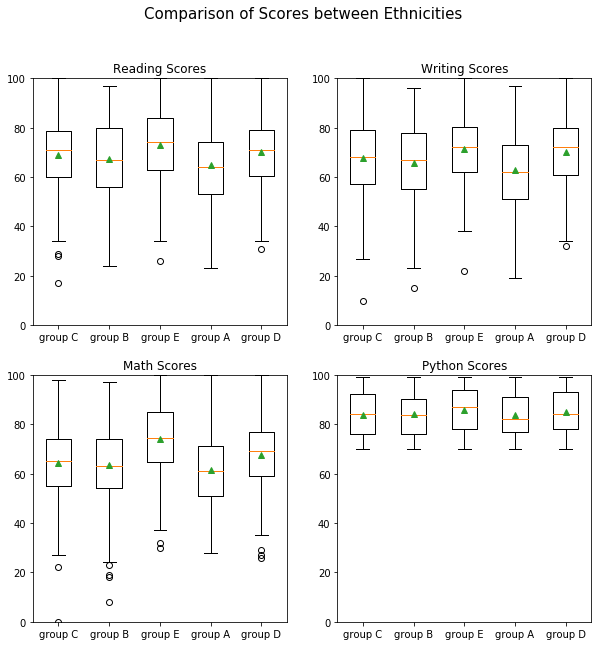

In [21]:
race_labels = set(data['race/ethnicity'])
scoretypes = ['reading score', 'writing score', 'math score','python score']

data1 = []
data3 = []
data2 = []
data4 = []

for group in set(data['race/ethnicity']):
    data1.append(get_scores_for_ethnicity('reading score', data, group))

for group in set(data['race/ethnicity']):
    data2.append(get_scores_for_ethnicity('writing score', data, group))

for group in set(data['race/ethnicity']):
    data3.append(get_scores_for_ethnicity('math score', data, group))
    
for group in set(data['race/ethnicity']):
    data4.append(get_scores_for_ethnicity('python score', data, group))

fig, axs = plt.subplots(2,2,figsize=(10,10))

axs[0][0].boxplot(data1, labels=race_labels, showmeans=True)
axs[0][0].set_title('Reading Scores')
axs[0][0].set_ylim(0,100)
axs[0][1].boxplot(data2, labels=race_labels, showmeans=True)
axs[0][1].set_title('Writing Scores')
axs[0][1].set_ylim(0,100)
axs[1][0].boxplot(data3, labels=race_labels, showmeans=True)
axs[1][0].set_title('Math Scores')
axs[1][0].set_ylim(0,100)
axs[1][1].boxplot(data4, labels=race_labels, showmeans=True)
axs[1][1].set_title('Python Scores')
axs[1][1].set_ylim(0,100)
fig.suptitle('Comparison of Scores between Ethnicities', fontsize=15)
plt.show()

### 4.2 Bar Plot 
- Plot the different mean scores for male and female for each test in one bar plot. 

In [22]:
def get_scores_for_gender(scoretype, data, gender):
    list_bool = []
    for gender_row in data['gender']:
        if gender_row == gender:
            list_bool.append(True)
        else:
            list_bool.append(False)
    # use the boolean mask to index the numpy array
    return data[scoretype][list_bool]

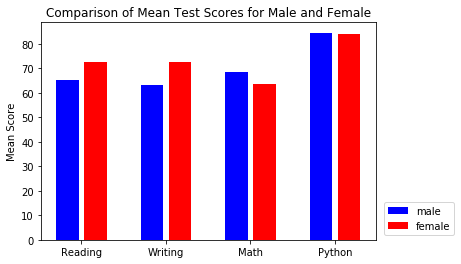

In [23]:
# Get the data
barDataMale, barDataFemale = [], []
for scoretype in scoretypes:
        barDataFemale.append(np.mean(get_scores_for_gender(scoretype, data, 'female')))
        barDataMale.append(np.mean(get_scores_for_gender(scoretype, data, 'male')))
        
plt.bar([1,4,7,10], barDataMale, color='b', label='male')
plt.bar([2,5,8,11], barDataFemale, color='r', label='female')

plt.legend(loc='lower right',bbox_to_anchor=(1.25, 0))
plt.xticks([1.5, 4.5, 7.5, 10.5], ['Reading', 'Writing', 'Math', 'Python'])
plt.ylabel('Mean Score')
plt.title('Comparison of Mean Test Scores for Male and Female')
plt.show()

### 4.3 Histogram
For each test, plot a histogram of the scores for male and female for only those that have completed the test preparation course.
- plot all histograms as subplots in one figure
- give proper titles and legends


In [24]:
def get_scores_for_gender_if_prep(scoretype, data, gender):
    list_bool = []
    for gender_row, prep in zip(data['gender'],data['test preparation course']):
        if gender_row == gender and prep=="completed":
            list_bool.append(True)
        else:
            list_bool.append(False)
    # use the boolean mask to index the numpy array
    return data[scoretype][list_bool]

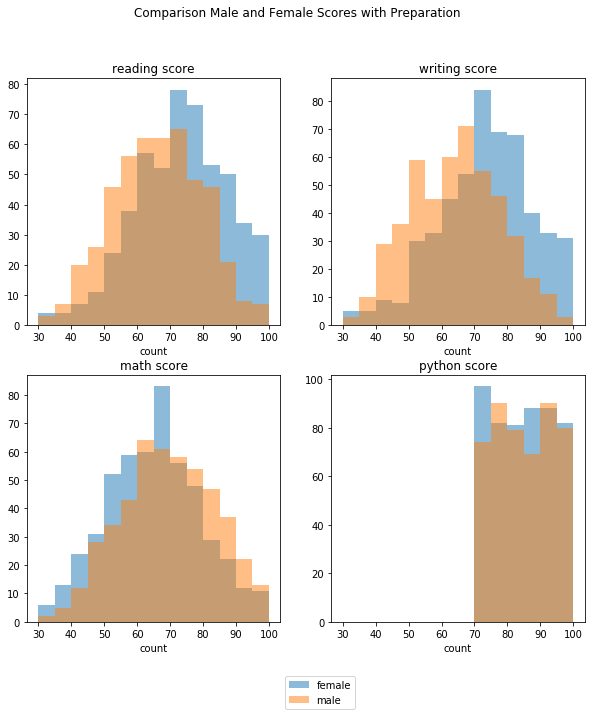

In [25]:
barDataFemalePrep = []
barDataMalePrep = []

scoretypes = list(scoretypes)

for scoretype in scoretypes:
        barDataFemalePrep.append(get_scores_for_gender(scoretype, data, 'female'))
        barDataMalePrep.append(get_scores_for_gender(scoretype, data, 'male'))
        
fig, axs = plt.subplots(2,2,figsize=(10,10))

for i in range(4):
    axs[i//2][i%2].hist(barDataFemalePrep[i], label="female", alpha=0.5, bins=range(30,101,5))
    axs[i//2][i%2].hist(barDataMalePrep[i], label="male", alpha=0.5, bins=range(30,101,5))
    axs[i//2][i%2].set_title(scoretypes[i])
    axs[i//2][i%2].set_xlabel("count")
    
handles, labels = axs[0][0].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower right', bbox_to_anchor=(0.5,0))
fig.suptitle("Comparison Male and Female Scores with Preparation")        
plt.show()


### 3.3 Scatter Plots and Line Plots
- Make a scatter plot comparing the reading scores to the writing scores for different parental education
- Color the different markers depending on parental education

In [26]:
def get_scores_for_parental_education(scoretype, data, p_education):
    list_bool = []
    for p_education_row in data["parental level of education"]:
        if p_education_row == p_education:
            list_bool.append(True)
        else:
            list_bool.append(False)
    # use the boolean mask to index the numpy array
    return data[scoretype][list_bool]

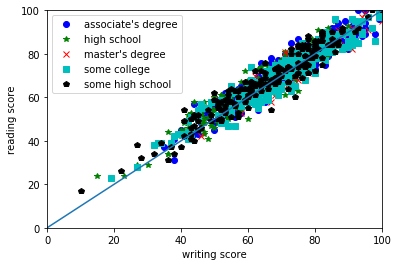

In [27]:
p_educations = list(set(data["parental level of education"]))
markers = ['o','*','x','s','p']
colors = ['b','g','r','c','k']

for marker, color, p_edu in zip(markers, colors, p_educations):
        x = get_scores_for_parental_education('writing score', data, p_edu)
        y = get_scores_for_parental_education('reading score', data, p_edu)
        plt.plot(x,y,label=p_edu, linestyle="", marker=marker, color=color)

plt.plot([0,100],[0,100])
plt.legend(loc="upper left")
plt.xlabel("writing score")
plt.ylabel("reading score")
plt.xlim(0,100)
plt.ylim(0,100)
plt.show()
    

## 4 Advanced: Convert Dataset into numpy Array with one-hot-encoding:

We want to convert the dataset of our students into a numpy array. Since some values are not numerical, we need to "one-hot encode" these values. That means, for every categorial value of a categorial column, we add a new column, with the categorial value as header. In that new column, we write a 1, if the previous value is equal to the header name. Here is an example:

![](one-hot-encoding-example.png)

This in necessary, since most algorithms can not work with labeled/categeorial data. Therefore we simply add new column to our dataset, which tells us if a category is present or not. 

- read our dataset in _"NewStudentPerformance.csv"_ into a dictionary (we already have that)
- find the categorial features/column of our dataset.
- for each categorial feature/column, replace it with n-columns, where n is the number of categories.
- fill the new columns with 1 and 0, depending if the category is satisfied.
- your final data container should be a single numpy array

In [46]:
# TODO get n from data
n = 1000

numerical_columns = ["reading score","python score","writing score", "math score"]
catetgorial_cols = [x for x in data.keys() if x not in numerical_columns and x != "ids"]

num_arrs = [data[num_col].reshape((n,1)) for num_col in numerical_columns]

data_arr = np.concatenate(num_arrs,axis=1)
data_arr.shape

cat_arrs = []
hot_cats = []


for cat_col in catetgorial_cols:
    cats = list(set(data[cat_col]))
     
    #iterate over each category
    for category in cats:
        list_bool = np.zeros((n,1), dtype="uint8")
        for i in range(n):
            if data[cat_col][i] == category:
                list_bool[i,]=1
        
        hot_cats.append(cat_col+"_"+category)
        cat_arrs.append(list_bool)
    
data_arr_cat = np.concatenate(cat_arrs,axis=1)
data_arr = np.concatenate((data_arr,data_arr_cat), axis=1)
print(data_arr.shape) 
header=",".join(numerical_columns+hot_cats)
print(header)
np.savetxt("hot_data.csv", data_arr, delimiter=",", header=header, comments='')

(1000, 21)
reading score,python score,writing score,math score,parental level of education_associate's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,parental level of education_bachelor's degree,gender_female,gender_male,race/ethnicity_group C,race/ethnicity_group B,race/ethnicity_group E,race/ethnicity_group A,race/ethnicity_group D,lunch_free/reduced,lunch_standard,test preparation course_completed,test preparation course_none


In [ ]:
data_hot = data_arr.copy()
print(data_arr.dtype)
data_hot.dtype = np.dtype('int,'*21)
data_hot["f20"]